# Recurrent Neural Networks
Recurrent neural networks have connections that have loops, adding feedback and memory to the networks over time. This memory allows this type of network to learn and generalize across sequences of inputs rather than individual patterns.

There are some problem types that are best framed involving either a sequence as an input or an output. For example, consider a univariate time series problem, like the price of a stock over time. This dataset can be framed as a prediction problem for a classical feedforward Multilayer Perceptron network by defining a windows size (e.g. 5) and training the network to learn to make short term predictions from the fixed sized window of inputs.

This would work, but is very limited. The window of inputs adds memory to the problem, but is limited to just a fixed number of points and must be chosen with su cient knowledge of the problem. A naive window would not capture the broader trends over minutes, hours and days that might be relevant to making a prediction. From one prediction to the next, the network only knows about the specific inputs it is provided.

## RNN :- 
Given a standard feedforward Multilayer Perceptron network, a recurrent neural network can be thought of as the addition of loops to the architecture. For example, in a given layer, each neuron may pass its signal latterly (sideways) in addition to forward to the next layer. The output of the network may feedback as an input to the network with the next input vector.

## How to train RNN :-
A modification of the Back propagation technique called Back propagation Through Time or BPTT is used for that purpose.

Instead of performing back propagation on the recurrent network as stated, the structure of the network is unrolled, where copies of the neurons that have recurrent connections are created. For example a single neuron with a connection to itself (A -> A) could be represented as two neurons with the same weight values (A -> B). This allows the cyclic graph of a recurrent neural network to be turned into an acyclic graph like a classic feedforward neural network, and Back propagation can be applied.

## How to have a stable Gradients During Training :-
When Back propagation is used in very deep neural networks and in unrolled recurrent neural networks, the gradients that are calculated in order to update the weights can become unstable. They can become very large numbers called exploding gradients or very small numbers called the vanishing gradient problem. These large numbers in turn are used to update the weights in the network, making training unstable and the network unreliable.

This problem is alleviated in deep Multilayer Perceptron networks through the use of the Rectifier transfer function, and even more exotic but now less popular approaches of using unsupervised pre-training of layers. In recurrent neural network architectures, this problem has been alleviated using a new type of architecture called the Long Short-Term Memory Networks that allows deep recurrent networks to be trained.

## Long Short-Term Memory Networks
Instead of neurons, LSTM networks have memory blocks that are connected into layers. A block contains gates that manage the block’s state and output. A unit operates upon an input sequence and each gate within a unit uses the sigmoid activation function to control whether they are triggered or not, making the change of state and addition of information flowing through the unit conditional. There are three types of gates within a memory unit:

1. Forget Gate: conditionally decides what information to discard from the unit.
2. Input Gate: conditionally decides which values from the input to update the memory state.
3. Output Gate: conditionally decides what to output based on input and the memory of the unit.


## Time Series Prediction with Multilayer Perceptrons

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Import keras
from keras.models import Sequential 
from keras.layers import Dense, Dropout, LSTM

# Import Sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

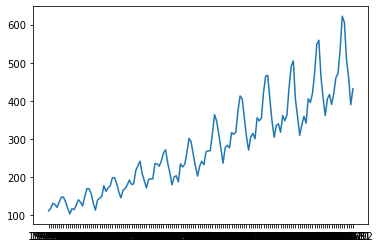

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/atystats/Deep-Learning-Python---Self-Learning/master/Datasets/Airline%20Passanger%20Data.csv", index_col = 0)
dataset = pd.DataFrame(dataset.loc[:,"International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60"])
plt.plot(dataset)
plt.show()

In [3]:
dataset = dataset.values
dataset = dataset.astype('float32')

# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0: train_size,  :], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [4]:
def create_dataset(dataset, look_back = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [53]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [58]:
# Create and fit Multilayer Perceptron Model
model = Sequential()
model.add(Dense(8, input_dim = look_back, activation = 'relu'))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs = 200, batch_size = 2, verbose = 2)

Epoch 1/200
47/47 - 0s - loss: 33428.5781
Epoch 2/200
47/47 - 0s - loss: 25299.1641
Epoch 3/200
47/47 - 0s - loss: 18015.5059
Epoch 4/200
47/47 - 0s - loss: 12045.2139
Epoch 5/200
47/47 - 0s - loss: 7413.1860
Epoch 6/200
47/47 - 0s - loss: 4241.9331
Epoch 7/200
47/47 - 0s - loss: 2303.1321
Epoch 8/200
47/47 - 0s - loss: 1273.6676
Epoch 9/200
47/47 - 0s - loss: 803.4185
Epoch 10/200
47/47 - 0s - loss: 626.3193
Epoch 11/200
47/47 - 0s - loss: 563.8907
Epoch 12/200
47/47 - 0s - loss: 543.9911
Epoch 13/200
47/47 - 0s - loss: 539.7604
Epoch 14/200
47/47 - 0s - loss: 538.4777
Epoch 15/200
47/47 - 0s - loss: 539.8640
Epoch 16/200
47/47 - 0s - loss: 537.5233
Epoch 17/200
47/47 - 0s - loss: 539.3382
Epoch 18/200
47/47 - 0s - loss: 536.1523
Epoch 19/200
47/47 - 0s - loss: 537.6572
Epoch 20/200
47/47 - 0s - loss: 541.7223
Epoch 21/200
47/47 - 0s - loss: 536.9841
Epoch 22/200
47/47 - 0s - loss: 540.7573
Epoch 23/200
47/47 - 0s - loss: 540.7769
Epoch 24/200
47/47 - 0s - loss: 539.6409
Epoch 25/200


Epoch 199/200
47/47 - 0s - loss: 553.7355
Epoch 200/200
47/47 - 0s - loss: 536.7594


In [63]:
#Estimate model performance
trainscore = model.evaluate(trainX, trainY, verbose = 0)
print("Train Score: %.2f MSE (%.2f RMSE)" % (trainscore, math.sqrt(trainscore)))
testscore = model.evaluate(testX, testY, verbose = 0)
print("Test Score: %.2f MSE (%.2f RMSE)" % (testscore, math.sqrt(testscore)))

Train Score: 532.02 MSE (23.07 RMSE)
Test Score: 2356.11 MSE (48.54 RMSE)


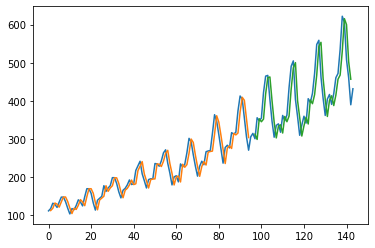

In [65]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Multilayer Perceptron using the window Method

We can also phrase the problem so that multiple recent time steps can be used to make the prediction for the next time step. This is called the window method, and the size of the window is a parameter that can be tuned for each problem. For example, given the current time (t) we want to predict the value at the next time in the sequence (t+1), we can use the current time (t) as well as the two prior times (t-1 and t-2). When phrased as a regression problem the input variables are t-2, t-1, t and the output variable is t+1.

In [66]:
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [67]:
# Create and fit Multilayer Perceptron Model
model = Sequential()
model.add(Dense(8, input_dim = look_back, activation = 'relu'))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs = 200, batch_size = 2, verbose = 2)

Epoch 1/200
43/43 - 0s - loss: 2951.1443
Epoch 2/200
43/43 - 0s - loss: 2212.6292
Epoch 3/200
43/43 - 0s - loss: 1819.6123
Epoch 4/200
43/43 - 0s - loss: 1671.1549
Epoch 5/200
43/43 - 0s - loss: 1649.0577
Epoch 6/200
43/43 - 0s - loss: 1574.0868
Epoch 7/200
43/43 - 0s - loss: 1538.8239
Epoch 8/200
43/43 - 0s - loss: 1548.7145
Epoch 9/200
43/43 - 0s - loss: 1464.8740
Epoch 10/200
43/43 - 0s - loss: 1433.2990
Epoch 11/200
43/43 - 0s - loss: 1486.1077
Epoch 12/200
43/43 - 0s - loss: 1345.2026
Epoch 13/200
43/43 - 0s - loss: 1337.8617
Epoch 14/200
43/43 - 0s - loss: 1334.1846
Epoch 15/200
43/43 - 0s - loss: 1301.4005
Epoch 16/200
43/43 - 0s - loss: 1257.5002
Epoch 17/200
43/43 - 0s - loss: 1250.0352
Epoch 18/200
43/43 - 0s - loss: 1199.4208
Epoch 19/200
43/43 - 0s - loss: 1217.7881
Epoch 20/200
43/43 - 0s - loss: 1102.6620
Epoch 21/200
43/43 - 0s - loss: 1198.3896
Epoch 22/200
43/43 - 0s - loss: 1103.8221
Epoch 23/200
43/43 - 0s - loss: 1072.7262
Epoch 24/200
43/43 - 0s - loss: 1045.1903
E

Epoch 198/200
43/43 - 0s - loss: 362.1153
Epoch 199/200
43/43 - 0s - loss: 350.3383
Epoch 200/200
43/43 - 0s - loss: 361.4352


In [68]:
#Estimate model performance
trainscore = model.evaluate(trainX, trainY, verbose = 0)
print("Train Score: %.2f MSE (%.2f RMSE)" % (trainscore, math.sqrt(trainscore)))
testscore = model.evaluate(testX, testY, verbose = 0)
print("Test Score: %.2f MSE (%.2f RMSE)" % (testscore, math.sqrt(testscore)))

Train Score: 328.10 MSE (18.11 RMSE)
Test Score: 1376.98 MSE (37.11 RMSE)


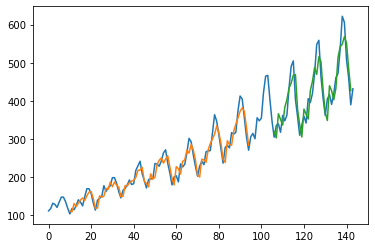

In [69]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Time Series Prediction with LSTM Recurrent Neural Networks
LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used.

The LSTM network expects the input data (X) to be provided with a specific array structure in the form of: [samples, time steps, features]. Our prepared data is in the form: [samples, features] and we are framing the problem as one time step for each sample.

In [5]:
#normalize the dataset
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(dataset)

In [6]:
# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0: train_size,  :], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [79]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape the input to be [sample, time_steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [80]:
# Create and fit LSTM network
model = Sequential()
model.add(LSTM(4, input_dim = look_back))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs = 100, batch_size = 1, verbose = 2)

Epoch 1/100
94/94 - 0s - loss: 0.0595
Epoch 2/100
94/94 - 0s - loss: 0.0306
Epoch 3/100
94/94 - 0s - loss: 0.0215
Epoch 4/100
94/94 - 0s - loss: 0.0193
Epoch 5/100
94/94 - 0s - loss: 0.0181
Epoch 6/100
94/94 - 0s - loss: 0.0173
Epoch 7/100
94/94 - 0s - loss: 0.0162
Epoch 8/100
94/94 - 0s - loss: 0.0152
Epoch 9/100
94/94 - 0s - loss: 0.0142
Epoch 10/100
94/94 - 0s - loss: 0.0131
Epoch 11/100
94/94 - 0s - loss: 0.0120
Epoch 12/100
94/94 - 0s - loss: 0.0110
Epoch 13/100
94/94 - 0s - loss: 0.0100
Epoch 14/100
94/94 - 0s - loss: 0.0089
Epoch 15/100
94/94 - 0s - loss: 0.0080
Epoch 16/100
94/94 - 0s - loss: 0.0070
Epoch 17/100
94/94 - 0s - loss: 0.0061
Epoch 18/100
94/94 - 0s - loss: 0.0054
Epoch 19/100
94/94 - 0s - loss: 0.0046
Epoch 20/100
94/94 - 0s - loss: 0.0040
Epoch 21/100
94/94 - 0s - loss: 0.0035
Epoch 22/100
94/94 - 0s - loss: 0.0031
Epoch 23/100
94/94 - 0s - loss: 0.0027
Epoch 24/100
94/94 - 0s - loss: 0.0025
Epoch 25/100
94/94 - 0s - loss: 0.0023
Epoch 26/100
94/94 - 0s - loss: 0.

In [82]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

#Estimate model performance
trainscore = mean_squared_error(trainY[0], trainPredict[:,0])
print("Train Score: %.2f MSE (%.2f RMSE)" % (trainscore, math.sqrt(trainscore)))
testscore = mean_squared_error(testY[0], testPredict[:,0])
print("Test Score: %.2f MSE (%.2f RMSE)" % (testscore, math.sqrt(testscore)))

Train Score: 537.97 MSE (23.19 RMSE)
Test Score: 2329.60 MSE (48.27 RMSE)


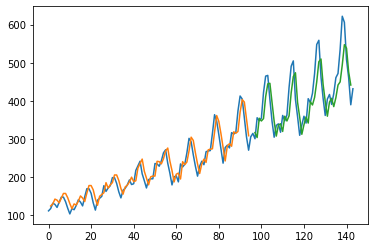

In [84]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## LSTM for Regression Using the Window Method

In [85]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape the input to be [sample, time_steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [86]:
# Create and fit LSTM network
model = Sequential()
model.add(LSTM(4, input_dim = look_back))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs = 100, batch_size = 1, verbose = 2)

Epoch 1/100
92/92 - 0s - loss: 0.0543
Epoch 2/100
92/92 - 0s - loss: 0.0198
Epoch 3/100
92/92 - 0s - loss: 0.0129
Epoch 4/100
92/92 - 0s - loss: 0.0106
Epoch 5/100
92/92 - 0s - loss: 0.0092
Epoch 6/100
92/92 - 0s - loss: 0.0078
Epoch 7/100
92/92 - 0s - loss: 0.0067
Epoch 8/100
92/92 - 0s - loss: 0.0058
Epoch 9/100
92/92 - 0s - loss: 0.0051
Epoch 10/100
92/92 - 0s - loss: 0.0046
Epoch 11/100
92/92 - 0s - loss: 0.0041
Epoch 12/100
92/92 - 0s - loss: 0.0038
Epoch 13/100
92/92 - 0s - loss: 0.0036
Epoch 14/100
92/92 - 0s - loss: 0.0034
Epoch 15/100
92/92 - 0s - loss: 0.0034
Epoch 16/100
92/92 - 0s - loss: 0.0033
Epoch 17/100
92/92 - 0s - loss: 0.0033
Epoch 18/100
92/92 - 0s - loss: 0.0032
Epoch 19/100
92/92 - 0s - loss: 0.0032
Epoch 20/100
92/92 - 0s - loss: 0.0031
Epoch 21/100
92/92 - 0s - loss: 0.0031
Epoch 22/100
92/92 - 0s - loss: 0.0031
Epoch 23/100
92/92 - 0s - loss: 0.0031
Epoch 24/100
92/92 - 0s - loss: 0.0031
Epoch 25/100
92/92 - 0s - loss: 0.0030
Epoch 26/100
92/92 - 0s - loss: 0.

In [87]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

#Estimate model performance
trainscore = mean_squared_error(trainY[0], trainPredict[:,0])
print("Train Score: %.2f MSE (%.2f RMSE)" % (trainscore, math.sqrt(trainscore)))
testscore = mean_squared_error(testY[0], testPredict[:,0])
print("Test Score: %.2f MSE (%.2f RMSE)" % (testscore, math.sqrt(testscore)))

Train Score: 472.51 MSE (21.74 RMSE)
Test Score: 4436.57 MSE (66.61 RMSE)


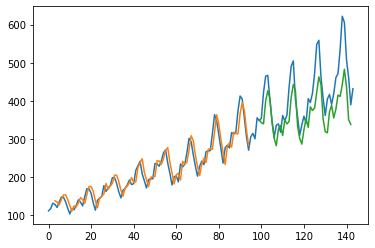

In [88]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## LSTM for Regression Using the Time Steps
Instead of phrasing the past observations as separate input features, we can use them as time steps of the one input feature, which is indeed a more accurate framing of the problem.

In [7]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape the input to be [sample, time_steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

Epoch 1/100
92/92 - 0s - loss: 0.0157
Epoch 2/100
92/92 - 0s - loss: 0.0080
Epoch 3/100
92/92 - 0s - loss: 0.0070
Epoch 4/100
92/92 - 0s - loss: 0.0059
Epoch 5/100
92/92 - 0s - loss: 0.0052
Epoch 6/100
92/92 - 0s - loss: 0.0046
Epoch 7/100
92/92 - 0s - loss: 0.0043
Epoch 8/100
92/92 - 0s - loss: 0.0039
Epoch 9/100
92/92 - 0s - loss: 0.0037
Epoch 10/100
92/92 - 0s - loss: 0.0037
Epoch 11/100
92/92 - 0s - loss: 0.0037
Epoch 12/100
92/92 - 0s - loss: 0.0036
Epoch 13/100
92/92 - 0s - loss: 0.0036
Epoch 14/100
92/92 - 0s - loss: 0.0036
Epoch 15/100
92/92 - 0s - loss: 0.0036
Epoch 16/100
92/92 - 0s - loss: 0.0036
Epoch 17/100
92/92 - 0s - loss: 0.0037
Epoch 18/100
92/92 - 0s - loss: 0.0035
Epoch 19/100
92/92 - 0s - loss: 0.0035
Epoch 20/100
92/92 - 0s - loss: 0.0034
Epoch 21/100
92/92 - 0s - loss: 0.0036
Epoch 22/100
92/92 - 0s - loss: 0.0036
Epoch 23/100
92/92 - 0s - loss: 0.0035
Epoch 24/100
92/92 - 0s - loss: 0.0035
Epoch 25/100
92/92 - 0s - loss: 0.0035
Epoch 26/100
92/92 - 0s - loss: 0.

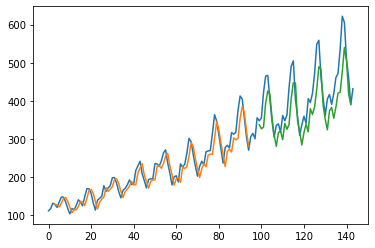

In [8]:
# Create and fit LSTM network
model = Sequential()
model.add(LSTM(4, input_dim = 1))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs = 100, batch_size = 1, verbose = 2)

# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

#Estimate model performance
trainscore = mean_squared_error(trainY[0], trainPredict[:,0])
print("Train Score: %.2f MSE (%.2f RMSE)" % (trainscore, math.sqrt(trainscore)))
testscore = mean_squared_error(testY[0], testPredict[:,0])
print("Test Score: %.2f MSE (%.2f RMSE)" % (testscore, math.sqrt(testscore)))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## LSTM with Memory between batches
The LSTM network has memory which is capable of remembering across long sequences. Normally, the state within the network is reset after each training batch when fitting the model, as well as each call to model.predict() or model.evaluate(). We can gain finer control over when the internal state of the LSTM network is cleared in Keras by making the LSTM layer stateful. This means that it can build state over the entire training sequence and even maintain that state if needed to make predictions.

It requires that the training data not be shuffled when fitting the network. It also requires explicit resetting of the network state after each exposure to the training data (epoch) by calls to model.reset states(). This means that we must create our own outer loop of epochs and within each epoch call model.fit() and model.reset states()

In [12]:
# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0: train_size,  :], dataset[train_size:len(dataset),:]
print(len(train), len(test))

look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape the input to be [sample, time_steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

96 48


In [13]:
batch_size = 1
# Create and fit LSTM network
model = Sequential()
model.add(LSTM(4, batch_input_shape = [batch_size, look_back, 1], stateful = True))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
for i in range(100):
    model.fit(trainX, trainY, epochs = 1, batch_size = batch_size, verbose = 2, shuffle = False)
    model.reset_states()

# generate predictions for training
trainPredict = model.predict(trainX, batch_size = batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size = batch_size)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

#Estimate model performance
trainscore = mean_squared_error(trainY[0], trainPredict[:,0])
print("Train Score: %.2f MSE (%.2f RMSE)" % (trainscore, math.sqrt(trainscore)))
testscore = mean_squared_error(testY[0], testPredict[:,0])
print("Test Score: %.2f MSE (%.2f RMSE)" % (testscore, math.sqrt(testscore)))

92/92 - 0s - loss: 0.0059
92/92 - 0s - loss: 0.0176
92/92 - 0s - loss: 0.0120
92/92 - 0s - loss: 0.0084
92/92 - 0s - loss: 0.0062
92/92 - 0s - loss: 0.0052
92/92 - 0s - loss: 0.0050
92/92 - 0s - loss: 0.0050
92/92 - 0s - loss: 0.0051
92/92 - 0s - loss: 0.0050
92/92 - 0s - loss: 0.0050
92/92 - 0s - loss: 0.0049
92/92 - 0s - loss: 0.0048
92/92 - 0s - loss: 0.0048
92/92 - 0s - loss: 0.0047
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0031
92/92 - 0s -

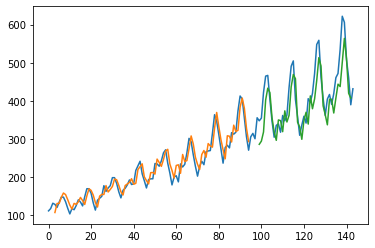

In [14]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Stacked LSTM with Memory between batches

In [15]:
# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0: train_size,  :], dataset[train_size:len(dataset),:]
#print(len(train), len(test))

look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape the input to be [sample, time_steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

batch_size = 1
# Create and fit LSTM network
model = Sequential()
model.add(LSTM(4, batch_input_shape = [batch_size, look_back, 1], stateful = True, 
              return_sequences = True))
model.add(LSTM(4, batch_input_shape = [batch_size, look_back, 1], stateful = True))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
for i in range(100):
    model.fit(trainX, trainY, epochs = 1, batch_size = batch_size, verbose = 2, shuffle = False)
    model.reset_states()

# generate predictions for training
trainPredict = model.predict(trainX, batch_size = batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size = batch_size)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

#Estimate model performance
trainscore = mean_squared_error(trainY[0], trainPredict[:,0])
print("Train Score: %.2f MSE (%.2f RMSE)" % (trainscore, math.sqrt(trainscore)))
testscore = mean_squared_error(testY[0], testPredict[:,0])
print("Test Score: %.2f MSE (%.2f RMSE)" % (testscore, math.sqrt(testscore)))

92/92 - 0s - loss: 0.0050
92/92 - 0s - loss: 0.0276
92/92 - 0s - loss: 0.0177
92/92 - 0s - loss: 0.0130
92/92 - 0s - loss: 0.0098
92/92 - 0s - loss: 0.0075
92/92 - 0s - loss: 0.0064
92/92 - 0s - loss: 0.0059
92/92 - 0s - loss: 0.0057
92/92 - 0s - loss: 0.0056
92/92 - 0s - loss: 0.0055
92/92 - 0s - loss: 0.0055
92/92 - 0s - loss: 0.0054
92/92 - 0s - loss: 0.0054
92/92 - 0s - loss: 0.0054
92/92 - 0s - loss: 0.0055
92/92 - 0s - loss: 0.0055
92/92 - 0s - loss: 0.0056
92/92 - 0s - loss: 0.0057
92/92 - 0s - loss: 0.0058
92/92 - 0s - loss: 0.0058
92/92 - 0s - loss: 0.0059
92/92 - 0s - loss: 0.0059
92/92 - 0s - loss: 0.0058
92/92 - 0s - loss: 0.0058
92/92 - 0s - loss: 0.0058
92/92 - 0s - loss: 0.0057
92/92 - 0s - loss: 0.0057
92/92 - 1s - loss: 0.0056
92/92 - 0s - loss: 0.0056
92/92 - 0s - loss: 0.0055
92/92 - 0s - loss: 0.0055
92/92 - 0s - loss: 0.0054
92/92 - 0s - loss: 0.0054
92/92 - 0s - loss: 0.0053
92/92 - 0s - loss: 0.0053
92/92 - 0s - loss: 0.0052
92/92 - 0s - loss: 0.0052
92/92 - 0s -

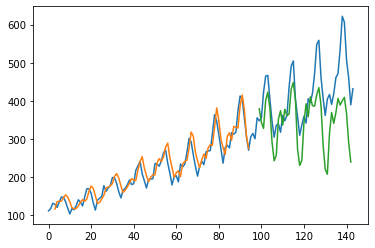

In [16]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()